In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from legged_gym.utils.terrain_utils import *

In [3]:
horizontal_scale = 0.1 # [m]
vertical_scale = 0.005 # [m]
env_length = 12.
env_width = 12.

width_per_env_pixels = int(env_width / horizontal_scale)
length_per_env_pixels = int(env_length / horizontal_scale)

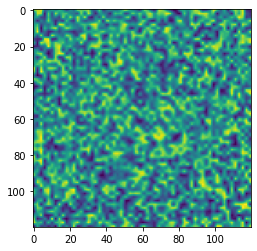

In [4]:
terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
random_uniform_terrain(terrain, min_height=-0.05, max_height=0.05, step=0.005, downsampled_scale=0.2)
plt.imshow(terrain.height_field_raw)

Text(0.5, 0, 'pit')

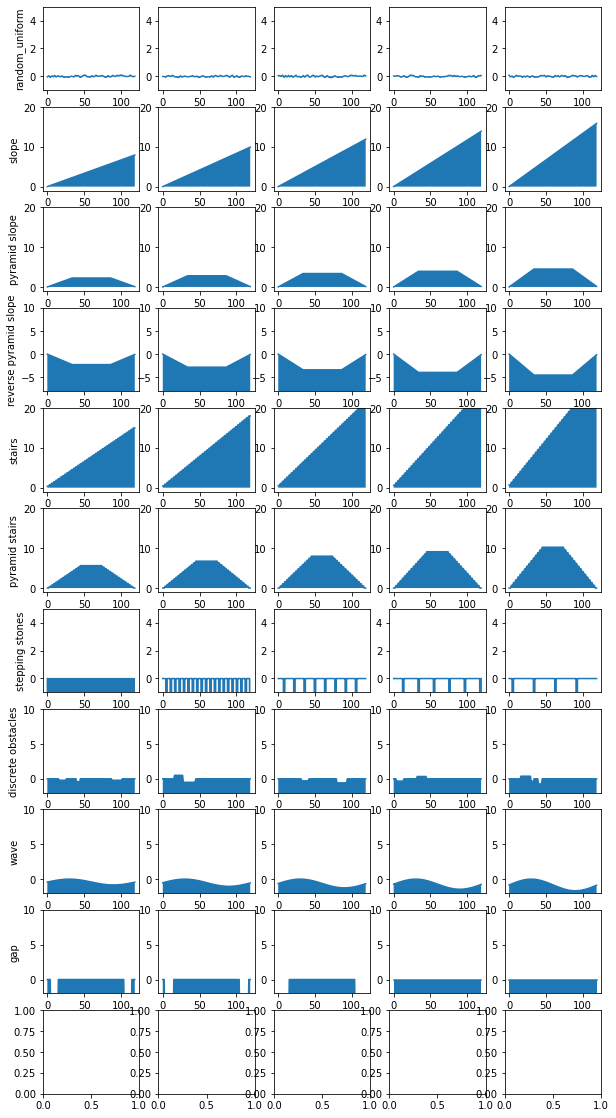

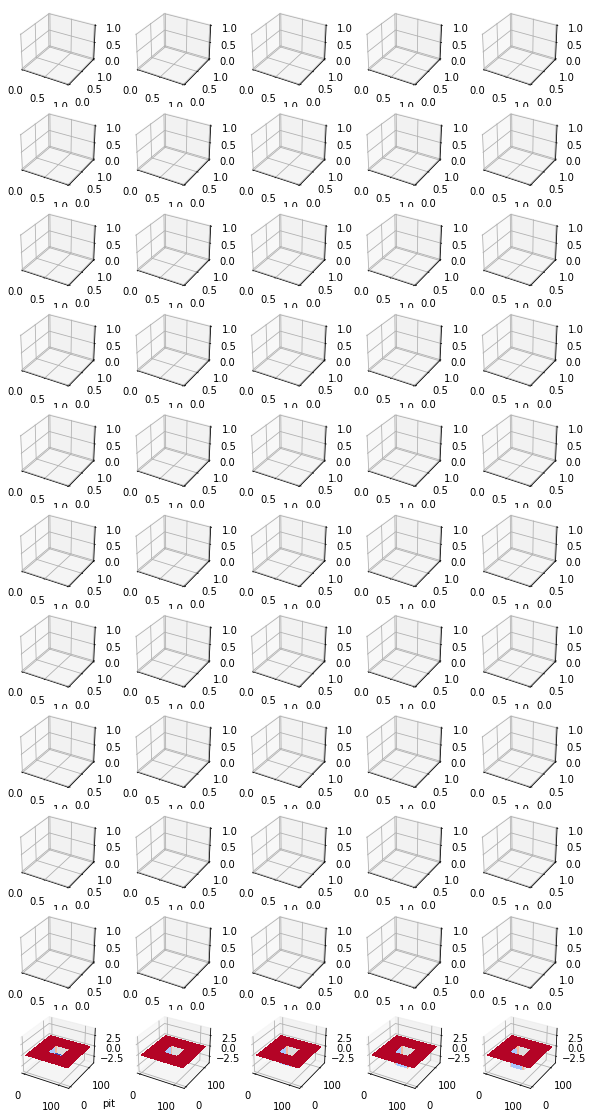

In [5]:
fig, axs = plt.subplots(11, 5, figsize=(10, 20))
x = np.arange(0., length_per_env_pixels)

X = np.arange(0., length_per_env_pixels)
Y = np.arange(0., width_per_env_pixels)
X, Y = np.meshgrid(X, Y)

difficulty_levels = np.linspace(1, 2, 5)
# random noise
for i, difficulty in enumerate(difficulty_levels):
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    random_uniform_terrain(terrain, min_height=-0.05, max_height=0.05, step=0.005, downsampled_scale=0.2)
    axs[0, i].plot(terrain.height_field_raw[:, 0] / length_per_env_pixels)
    axs[0, i].fill_between(x, terrain.height_field_raw[:, 0] / length_per_env_pixels)
    axs[0, i].set_ylim([-1., 5.])
axs[0, 0].set_ylabel('random_uniform')

# slope
for i, difficulty in enumerate(difficulty_levels):
    slope = difficulty * 0.4
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    sloped_terrain(terrain, slope=slope)
    axs[1, i].plot(x, terrain.height_field_raw[:, 0] / length_per_env_pixels)
    axs[1, i].fill_between(x, terrain.height_field_raw[:, 0] / length_per_env_pixels)
    axs[1, i].set_ylim([-1., 20.])
axs[1, 0].set_ylabel('slope')

# pyramid_sloped_terrain
for i, difficulty in enumerate(difficulty_levels):
    slope = difficulty * 0.4
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    pyramid_sloped_terrain(terrain, slope=slope, platform_size=3.)
    axs[2, i].plot(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[2, i].fill_between(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[2, i].set_ylim([-1., 20.])
axs[2, 0].set_ylabel('pyramid slope')

# pyramid_sloped_terrain
for i, difficulty in enumerate(difficulty_levels):
    slope = - difficulty * 0.4
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    pyramid_sloped_terrain(terrain, slope=slope, platform_size=3.)
    axs[3, i].plot(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[3, i].fill_between(x, np.ones_like(x) * -40, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[3, i].set_ylim([-8., 10.])
axs[3, 0].set_ylabel('reverse pyramid slope')

# stairs_terrain
for i, difficulty in enumerate(difficulty_levels):
    step_height = 0.05 + 0.18 * difficulty
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    stairs_terrain(terrain, step_width=0.31, step_height=step_height)
    axs[4, i].plot(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[4, i].fill_between(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[4, i].set_ylim([-1., 20.])
axs[4, 0].set_ylabel('stairs')

# pyramid_stairs_terrain
for i, difficulty in enumerate(difficulty_levels):
    step_height = 0.05 + 0.18 * difficulty
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    pyramid_stairs_terrain(terrain, step_width=0.31, step_height=step_height, platform_size=3.)
    axs[5, i].plot(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[5, i].fill_between(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[5, i].set_ylim([-1., 20.])
axs[5, 0].set_ylabel('pyramid stairs')

# stepping_stones_terrain
for i, difficulty in enumerate(difficulty_levels):
    stepping_stones_size = 1.5 * np.abs(1.05 - difficulty) * 2
    stone_distance = 0.05 if difficulty == 0 else 0.1
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    stepping_stones_terrain(terrain, stone_size=stepping_stones_size, stone_distance=stone_distance, max_height=0., platform_size=4.)
    axs[6, i].plot(x, terrain.height_field_raw[:, 0] / length_per_env_pixels)
    axs[6, i].fill_between(x, terrain.height_field_raw[:, 0] / length_per_env_pixels)
    axs[6, i].set_ylim([-1., 5.])
axs[6, 0].set_ylabel('stepping stones')

# discrete_obstacles_terrain
for i, difficulty in enumerate(difficulty_levels):
    num_rectangles = 20
    rectangle_min_size = 1.
    rectangle_max_size = 2.
    discrete_obstacles_height = 0.05 + difficulty * 0.2
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    discrete_obstacles_terrain(terrain, discrete_obstacles_height, rectangle_min_size, rectangle_max_size, num_rectangles, platform_size=3.)
    axs[7, i].plot(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[7, i].fill_between(x, np.ones_like(x) * -4, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[7, i].set_ylim([-2., 10.])
axs[7, 0].set_ylabel('discrete obstacles')

# wave_terrain
for i, difficulty in enumerate(difficulty_levels):
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    wave_terrain(terrain, num_waves=1, amplitude=0.5 * difficulty)
    axs[8, i].plot(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[8, i].fill_between(x, np.ones_like(x) * -4, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[8, i].set_ylim([-2., 10.])
axs[8, 0].set_ylabel('wave')

# gap_terrain(terrain, gap_size=gap_size, platform_size=3.)
for i, difficulty in enumerate(difficulty_levels):
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    gap_terrain(terrain, gap_size=difficulty, platform_size=3.)
    axs[9, i].plot(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[9, i].fill_between(x, np.ones_like(x) * -4, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    axs[9, i].set_ylim([-2., 10.])
axs[9, 0].set_ylabel('gap')

fig, axs = plt.subplots(11, 5, figsize=(10, 20), subplot_kw={"projection": "3d"})

for i, difficulty in enumerate(difficulty_levels):
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    pit_terrain(terrain, depth=difficulty, platform_size=4.)
    # axs[10, i].plot(x, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    #axs[10, i].fill_between(x, np.ones_like(x) * -10, terrain.height_field_raw[:, 60] / length_per_env_pixels)
    # axs[10, i].set_ylim([-2., 10.])
    axs[10, i].plot_surface(X, Y, terrain.height_field_raw / length_per_env_pixels, cmap='coolwarm', linewidth=0, antialiased=False)
    axs[10, i].set_zlim(-4, 4)
axs[10, 0].set_ylabel('pit')


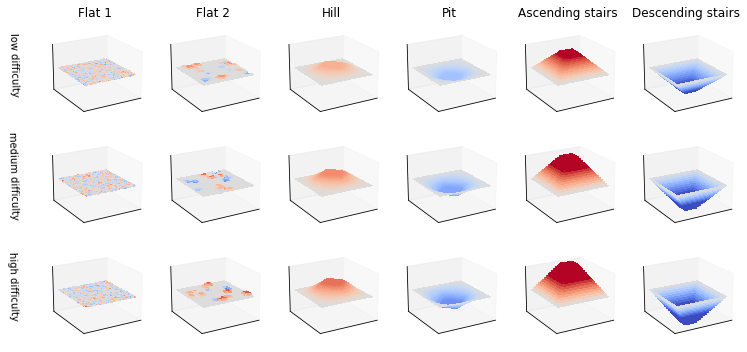

In [35]:
fig, axs = plt.subplots(3, 6, figsize=(10, 5), subplot_kw={"projection": "3d"})

X = np.arange(0., length_per_env_pixels)
Y = np.arange(0., width_per_env_pixels)
X, Y = np.meshgrid(X, Y)
cmap = 'hot'

mappable = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm)
mappable.set_clim(-3, 3) # optional

mappable_2 = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm)
mappable_2.set_clim(-0.5, 0.5) # optional

mappable_3 = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm)
mappable_3.set_clim(-0.1, 0.1) # optional

difficulty_levels = [0.5, 0.75, 0.9]
# random noise
for i, difficulty in enumerate(difficulty_levels):
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    random_uniform_terrain(terrain, min_height=-0.05, max_height=0.05, step=0.005, downsampled_scale=0.2)
    axs[i, 0].plot_surface(X, Y, terrain.height_field_raw / length_per_env_pixels, cmap=mappable_3.cmap, norm=mappable_3.norm, linewidth=0, antialiased=False)
    axs[i, 0].set_zlim(-4, 4)
    axs[i, 0].view_init(20, 60)
    axs[i, 0].grid(False); axs[i, 0].set_xticks([]); axs[i, 0].set_yticks([]); axs[i, 0].set_zticks([])
axs[0, 0].set_title('Flat 1')

# pyramid_sloped_terrain
for i, difficulty in enumerate(difficulty_levels):
    slope = difficulty * 0.4
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    pyramid_sloped_terrain(terrain, slope=slope, platform_size=3.)
    axs[i, 2].plot_surface(X, Y, terrain.height_field_raw / length_per_env_pixels, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
    axs[i, 2].set_zlim(-4, 4)
    axs[i, 2].view_init(20, 60)
    axs[i, 2].grid(False); axs[i, 2].set_xticks([]); axs[i, 2].set_yticks([]); axs[i, 2].set_zticks([])
axs[0, 2].set_title('Hill')

# pyramid_sloped_terrain
for i, difficulty in enumerate(difficulty_levels):
    slope = - difficulty * 0.4
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    pyramid_sloped_terrain(terrain, slope=slope, platform_size=3.)
    axs[i, 3].plot_surface(X, Y, terrain.height_field_raw / length_per_env_pixels, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
    axs[i, 3].set_zlim(-4, 4)
    axs[i, 3].view_init(20, 60)
    axs[i, 3].grid(False); axs[i, 3].set_xticks([]); axs[i, 3].set_yticks([]); axs[i, 3].set_zticks([])
axs[0, 3].set_title('Pit')

# pyramid_stairs_terrain
for i, difficulty in enumerate(difficulty_levels):
    step_height = 0.05 + 0.18 * difficulty
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    pyramid_stairs_terrain(terrain, step_width=0.31, step_height=step_height, platform_size=3.)
    axs[i, 4].plot_surface(X, Y, terrain.height_field_raw / length_per_env_pixels, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
    axs[i, 4].set_zlim(-4, 4)
    axs[i, 4].view_init(20, 60)
    axs[i, 4].grid(False); axs[i, 4].set_xticks([]); axs[i, 4].set_yticks([]); axs[i, 4].set_zticks([])
axs[0, 4].set_title('Ascending stairs')


# pyramid_stairs_terrain
for i, difficulty in enumerate(difficulty_levels):
    step_height = 0.05 + 0.18 * difficulty
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    pyramid_stairs_terrain(terrain, step_width=0.31, step_height=-step_height, platform_size=3.)
    axs[i, 5].plot_surface(X, Y, terrain.height_field_raw / length_per_env_pixels, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
    axs[i, 5].set_zlim(-4, 4)
    axs[i, 5].view_init(20, 60)
    axs[i, 5].grid(False); axs[i, 5].set_xticks([]); axs[i, 5].set_yticks([]); axs[i, 5].set_zticks([])
axs[0, 5].set_title('Descending stairs')

# discrete_obstacles_terrain
for i, difficulty in enumerate(difficulty_levels):
    num_rectangles = 20
    rectangle_min_size = 1.
    rectangle_max_size = 2.
    discrete_obstacles_height = 0.05 + difficulty * 0.2
    terrain = SubTerrain(width=width_per_env_pixels, length=length_per_env_pixels, vertical_scale=vertical_scale, horizontal_scale=horizontal_scale)
    discrete_obstacles_terrain(terrain, discrete_obstacles_height, rectangle_min_size, rectangle_max_size, num_rectangles, platform_size=3.)
    axs[i, 1].plot_surface(X, Y, terrain.height_field_raw / length_per_env_pixels, cmap=mappable_2.cmap, norm=mappable_2.norm, linewidth=0, antialiased=False)
    axs[i, 1].set_zlim(-4, 4)
    axs[i, 1].view_init(20, 60)
    axs[i, 1].grid(False); axs[i, 1].set_xticks([]); axs[i, 1].set_yticks([]); axs[i, 1].set_zticks([])
axs[0, 1].set_title('Flat 2')

axs[0, 0].set_zlabel('low difficulty')
axs[1, 0].set_zlabel('medium difficulty')
axs[2, 0].set_zlabel('high difficulty')

plt.tight_layout()
plt.savefig('terrain_examples.svg')